# 疫学的因果関係
統計学が物的証拠として使われる代表例としては法律の決定や他何らかのトラブルに対する因果関係を証明するために疫学的因果関係を推定する。ここで、疫学的因果関係は7つの構成要素があるが、一般的には疫学四原則の「時間的関連性」「量的相関性」「質的相関性」「原因と結果の関連性」になる。本項では疫学四原則の文面をそのままプログラムとして実装するため「原因と結果の関連性」以外を実装する。

# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# データの確認

In [2]:
df = pd.read_csv("rossi.csv")
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## 時間的関連性
財政支援されていない人が犯罪をするのか、犯罪をした人が財政支援されていないのかをベイズ推定で算出する。

In [3]:
x_col = "fin"
y_col = "arrest"
x_val = list(set(df[x_col].values.tolist()))
for x_v in x_val:
    dfx = df.query("%s==%d"%(x_col, x_v))
    y_val = list(set(dfx[y_col].values.tolist()))
    for y_v in y_val:
        dfxy = dfx.query("%s==%d"%(y_col, y_v))
        print("p(%s=%d  | %s=%d)=%.2f"%(y_col, y_v, x_col, x_v, len(dfxy)/len(dfx)))
y_val = list(set(df[y_col].values.tolist()))
for y_v in y_val:
    dfy = df.query("%s==%d"%(y_col, y_v))
    x_val = list(set(dfy[x_col].values.tolist()))
    for x_v in x_val:
        dfyx = dfy.query("%s==%d"%(x_col, x_v))
        print("p(%s=%d  | %s=%d)=%.2f"%(x_col, x_v, y_col, y_v, len(dfyx)/len(dfy)))

p(arrest=0  | fin=0)=0.69
p(arrest=1  | fin=0)=0.31
p(arrest=0  | fin=1)=0.78
p(arrest=1  | fin=1)=0.22
p(fin=0  | arrest=0)=0.47
p(fin=1  | arrest=0)=0.53
p(fin=0  | arrest=1)=0.58
p(fin=1  | arrest=1)=0.42


### 結果の解釈


## 量的相関性
逮捕されるまでの時間(次の犯罪までの時間)と過去に犯罪をした回数で相関係数を算出する。比較のために全部の要因と水準でも同様に相関係数を算出する。

C:\Users\decar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\decar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


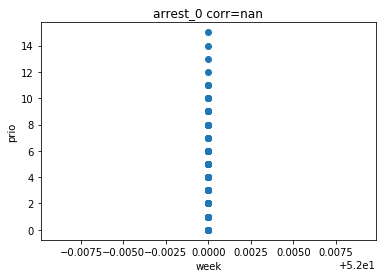

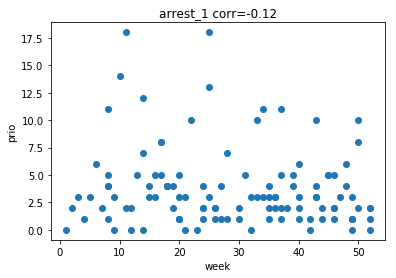

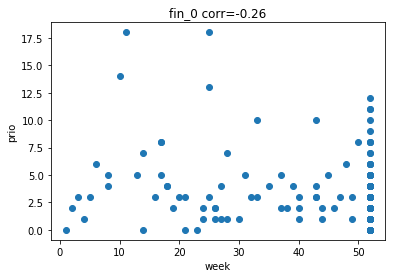

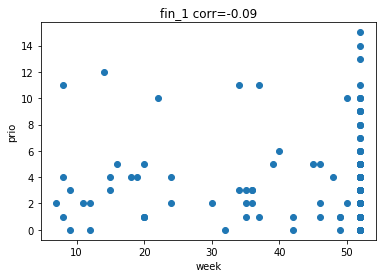

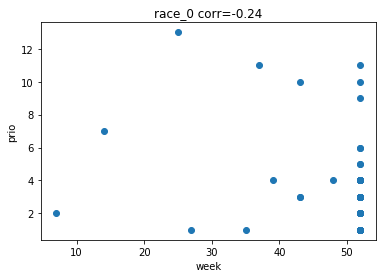

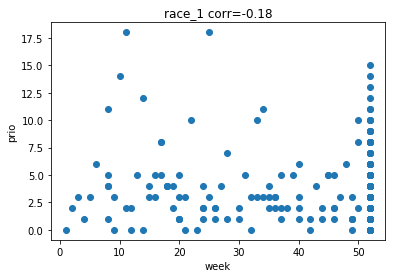

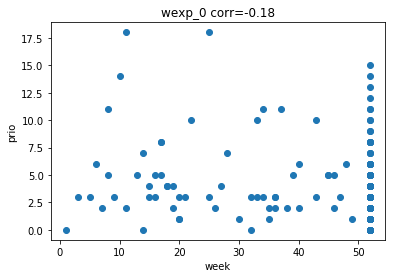

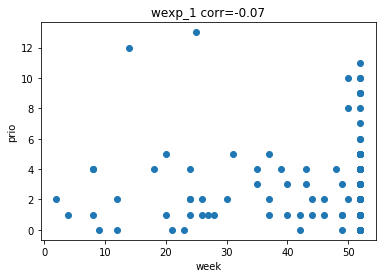

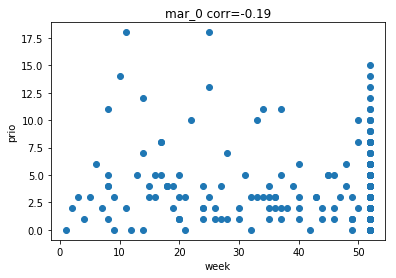

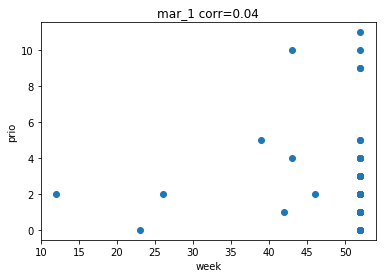

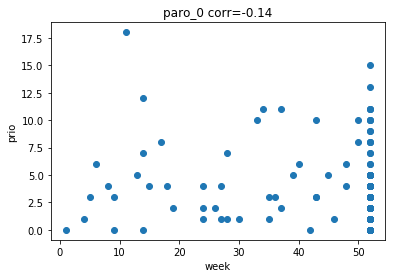

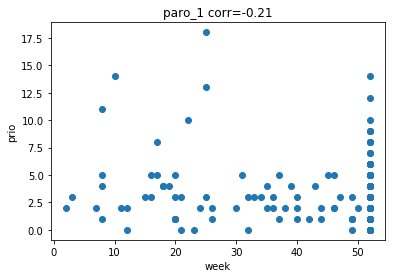

In [4]:
dfq = df.drop(["age", "week", "prio"], axis=1)
columns = dfq.columns
corarray = []
for col in columns:
    value = list(set(dfq[col].values.tolist()))
    for val in value:
        df_tmp = df.query("%s==%d"%(col, val))
        week = df_tmp["week"].values
        prio = df_tmp["prio"].values
        corr = np.corrcoef(week, prio)[0][1]
        plt.scatter(week,prio)
        plt.xlabel("week")
        plt.ylabel("prio")
        plt.title("%s_%d corr=%.2f"%(col, val, corr))
        plt.show()
        corarray.append([col,val,corr])

In [5]:
dfc = pd.DataFrame(corarray)
dfc.columns = ["項目", "水準", "相関係数"]
dfc

,項目,水準,相関係数
0,arrest,0,NaN
1,arrest,1,-0.124739
2,fin,0,-0.255530
3,fin,1,-0.090343
4,race,0,-0.235007
5,race,1,-0.181148
6,wexp,0,-0.181439
7,wexp,1,-0.070111
8,mar,0,-0.194088
9,mar,1,0.042418


### 結果の解釈


## 質的相関性
質的変数と逮捕について相関係数を算出する。

In [6]:
dfq_corr = dfq.corr()
dfq_corr

,arrest,fin,race,wexp,mar,paro
arrest,1.000000,-0.094538,0.031795,-0.139900,-0.095831,-0.026574
fin,-0.094538,1.000000,0.063502,0.004678,-0.035279,-0.014293
race,0.031795,0.063502,1.000000,-0.038453,-0.053716,0.040037
wexp,-0.139900,0.004678,-0.038453,1.000000,0.252340,0.051418
mar,-0.095831,-0.035279,-0.053716,0.252340,1.000000,0.090662
paro,-0.026574,-0.014293,0.040037,0.051418,0.090662,1.000000


### 結果の解釈
